In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import geopandas as gp
import urllib2
import pylab as pl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Reading the manhattan houses data using geopandas
manhattan_data = gp.GeoDataFrame.from_file('Manhattan/MNMapPLUTO.shp')


In [3]:
#Reading the citibike May 2015 csv data  with geopandas
citibike_may_df = gp.GeoDataFrame.from_csv('201505-citibike-tripdata.csv')

#Reading the citibike December 2015 csv data  with geopandas
citibike_dec_df = gp.GeoDataFrame.from_csv('201412-citibike-tripdata.csv')

In [4]:
# Getting the counts and the freequeny in the variables
citibikeMayCount = citibike_may_df["start station id"].value_counts() #Returns object containing counts of unique values.
citibikeMayCount = citibikeMayCount.reset_index() # new DataFrame with labeling information in the columns under the index names, defaulting to ‘level_0’, ‘level_1’, etc
citibikeDecCount = citibike_dec_df["start station id"].value_counts() #Same as citibikeMayCount
citibikeDecCount = citibikeDecCount.reset_index() # Same as citibikeMayCount


In [5]:
#Checking the value of 5 rows for May data 
citibikeMayCount.head(n=5)

,index,0
0,521,12988
1,519,10388
2,293,10265
3,426,9588
4,497,9469


In [6]:
#Checking the value of 5 rows for december data 
citibikeDecCount.head(n=5)

,index,0
0,521,6543
1,293,4501
2,318,4467
3,435,4031
4,519,3693


In [7]:
#Renaming the index and 0 for usage latter in code.
citibikeMayCount = citibikeMayCount.rename(columns={'index':'stationId', 0:'stationCount'}) # Renaming column names
#
citibikeDecCount = citibikeDecCount.rename(columns={'index':'stationId', 0:'stationCount'}) # Renaming column names


In [8]:
#Checking the value of 2 rows for May data 
citibikeMayCount.head(n=2)

,stationId,stationCount
0,521,12988
1,519,10388


In [9]:
#Checking the value of 2 rows for December data 
citibikeDecCount.head(n=2)

,stationId,stationCount
0,521,6543
1,293,4501


In [10]:
#Concatinating both the citibike datas using Pandas standard concat function
frames = [citibikeMayCount,citibikeDecCount] #Preparing frames for concatination
citibike_data = pd.concat(frames) # Concatinating the 2 data sets
citibike_data.head(n=3)

,stationId,stationCount
0,521,12988
1,519,10388
2,293,10265


In [11]:
#Sum up the common station id's if any
uniq_citibike_data = citibike_data['stationCount'].groupby(citibike_data['stationId']).agg(np.sum) # Using groupby function of pandas
uniq_citibike_data = uniq_citibike_data.reset_index() 
uniq_citibike_data = uniq_citibike_data.rename(columns={'index':'stationId', 0:'stationCount'}) 
print (uniq_citibike_data.head(n=5))
print len(uniq_citibike_data)

   stationId  stationCount
0         72          3793
1         79          3353
2         82          1538
3         83          1458
4        116          4396
332


In [12]:
#Reading the Json data from the given url and putting in the dictionary type variable
json_data = []
url = 'http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/stationzips.json'
request = urllib2.urlopen(url)
json_data = json.loads(request.read())
#json_data

In [13]:
#Converting Json data to Pandas Data Frame
stat_zip_data = pd.DataFrame(json_data.items(),columns=['stationId','zip'])
print 'before convert-->',(stat_zip_data['stationId'].dtype)
stat_zip_data['stationId'] = (stat_zip_data['stationId']).astype(float)
print 'after convert -->',(stat_zip_data['stationId'].dtype)


before convert--> object
after convert --> float64


In [14]:
#Merging the JSON data and the manipulated Citibike data of May and december
uniq_citibike_data['stationId'] = (uniq_citibike_data['stationId']).astype(float) # Converting the data to float to merge with float json data
citibike_zip_data = pd.merge(uniq_citibike_data,stat_zip_data,how='inner',on='stationId') #Merging the data with inner join on stationID
print citibike_zip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 331
Data columns (total 3 columns):
stationId       332 non-null float64
stationCount    332 non-null int64
zip             331 non-null float64
dtypes: float64(2), int64(1)
memory usage: 10.4 KB
None


In [16]:
#Just to see the data 
citibike_zip_data.head(n=5)

,stationId,stationCount,zip
0,72,3793,10019
1,79,3353,10013
2,82,1538,10038
3,83,1458,11217
4,116,4396,10011


In [17]:
#To see how my data looks like
citibike_zip_data.head(n=5)
count =0
for i in citibike_zip_data['zip']:
    if i == 83:
        count +=1
print count


1


In [18]:
# Adding the station counts for each zip
group_citibike_zip = citibike_zip_data['stationCount'].groupby(citibike_zip_data['zip']).agg(np.sum)
group_citibike_zip = group_citibike_zip.reset_index()
print group_citibike_zip
#group_citibike_zip

      zip  stationCount
0      83          8445
1   10001        107096
2   10002         78867
3   10003        150693
4   10004         13493
5   10005         17921
6   10007         34654
7   10009         66838
8   10010         50815
9   10011        113756
10  10012         57230
11  10013         63772
12  10014         87009
13  10016         81935
14  10017         54317
15  10018         42032
16  10019         85573
17  10022         35663
18  10023         10371
19  10036         53348
20  10038         21030
21  10280          9119
22  10281          1651
23  10282          9730
24  11201         48851
25  11205         15777
26  11211         17314
27  11216          2057
28  11217         11090
29  11220             6
30  11238          6071
31  11251          1038


In [19]:
# To see all the columns of the manhattan data
manhattan_data.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [20]:
#Simmilarly grouping the sum of the Manhattan units in the zip code
manhattan_data_zip = manhattan_data['UnitsTotal'].groupby(manhattan_data['ZipCode']).agg(np.sum)
manhattan_data_zip = manhattan_data_zip.reset_index()
manhattan_data_zip = manhattan_data_zip.rename(columns={'ZipCode':'zip', 0:'stationCount'})
#manhattan_data_zip['zip']= manhattan_data_zip['ZipCode'] # Changing the name to zip this will be useful while merging
manhattan_data_zip['zip'] = (manhattan_data_zip['zip']).astype(float) #Converting to float as zip in citibike is float
print manhattan_data_zip['zip'].dtype
manhattan_data_zip.head(n=3)

float64


,zip,UnitsTotal
0,0,2
1,10001,30253
2,10002,40627


In [21]:
# Merging the station rides of citibike and the Total units of the manhattan in single data frame using inner join on the column zip.
units_stations_zipData = pd.merge(manhattan_data_zip, group_citibike_zip, how ='inner',on='zip')
units_stations_zipData.head(n=5)

,zip,UnitsTotal,stationCount
0,10001,30253,107096
1,10002,40627,78867
2,10003,38201,150693
3,10004,3203,13493
4,10005,7041,17921


In [22]:
# Till now I have a data sets(dataframe) with the total units per zip code and total station count per zip code
#StationCpunt reffers to the total number of rides originating from the zip code
#UnitsTotal reffers to total number of units (units in each building if a building has more than 1 unit)

#####1) Fit BOTH a first and second degree linear model (a line and a parabola) to the number of rides per zip code (this is your dependent variable) as a function of number of Residential Units in that zip code (this is your independent variable).

###Starting the statestical analysis 


#### 1) Scatter plot the data for visual inspection

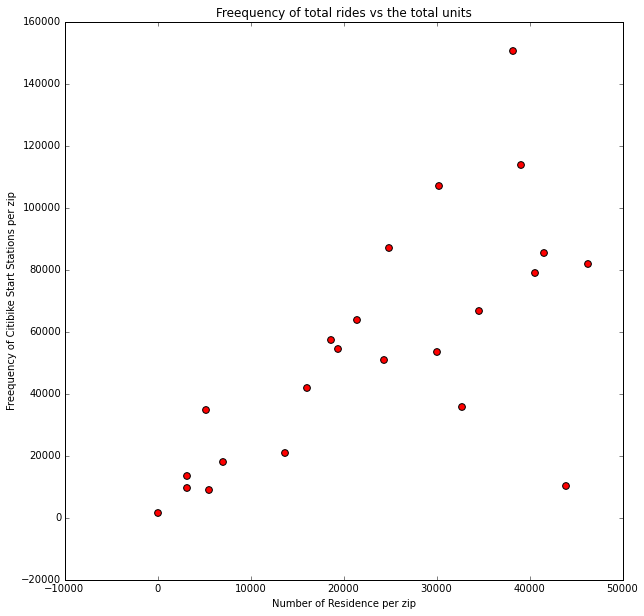

In [23]:
#Plotting the data with the outliers and zip code =0
plt.figure(figsize=(10, 10))
plt.scatter(units_stations_zipData['UnitsTotal'],units_stations_zipData['stationCount'],s=45,c='red')
plt.title('Freequency of total rides vs the total units')
plt.ylabel('Freequency of Citibike Start Stations per zip')
plt.xlabel('Number of Residence per zip')
#plt.bar(mynewdf['start station id'],mynewdf['UnitsRes'])


#### 2) Applying Ordinary least squares (ols) using statsmodels.formula.api (Linear) and plotting against above scatter plot

In [24]:
linModel = smf.ols(formula = 'stationCount ~ UnitsTotal', data = units_stations_zipData).fit()
print linModel.summary()
x=units_stations_zipData.UnitsTotal
y=units_stations_zipData.stationCount

                            OLS Regression Results                            
Dep. Variable:           stationCount   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     17.87
Date:                Mon, 26 Oct 2015   Prob (F-statistic):           0.000378
Time:                        14:18:44   Log-Likelihood:                -268.03
No. Observations:                  23   AIC:                             540.1
Df Residuals:                      21   BIC:                             542.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.253e+04   1.16e+04      1.081      0.2

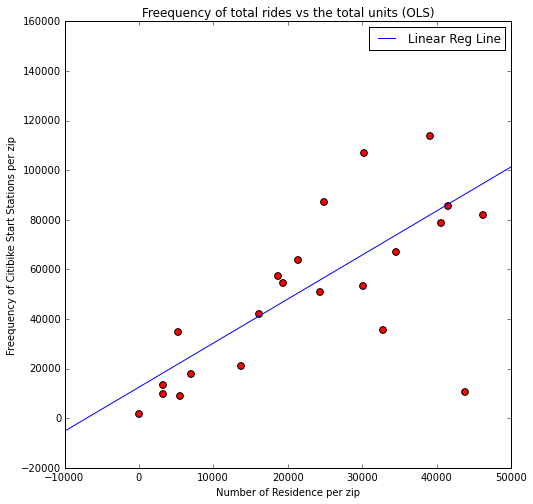

In [25]:
#Fitting the best line using abline_plot and plotting using pylab (instead of matplotlib as done above)

figure, ax = pl.subplots(figsize=(8,8))
ax.scatter(x, y,s=45, c='r')
# Plot regression line
abline_plot(model_results=linModel, c='b', ax=ax,label='Linear Reg Line')
pl.title('Freequency of total rides vs the total units (OLS)')
pl.ylabel('Freequency of Citibike Start Stations per zip')
pl.xlabel('Number of Residence per zip')

plt.legend()

#### 2) Applying Ordinary least squares (ols) using statsmodels.formula.api (Polynomial) and plotting against above scatter plot

In [26]:
# creating the model to fit the polynomial regression
polModel = smf.ols(formula = 'stationCount ~ 1 + UnitsTotal + I(UnitsTotal ** 2.0)',missing='drop', data =units_stations_zipData).fit()
print polModel.summary()

                            OLS Regression Results                            
Dep. Variable:           stationCount   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     10.62
Date:                Mon, 26 Oct 2015   Prob (F-statistic):           0.000719
Time:                        14:18:47   Log-Likelihood:                -266.78
No. Observations:                  23   AIC:                             539.6
Df Residuals:                      20   BIC:                             543.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept            -3384.4154 

<type 'numpy.ndarray'>


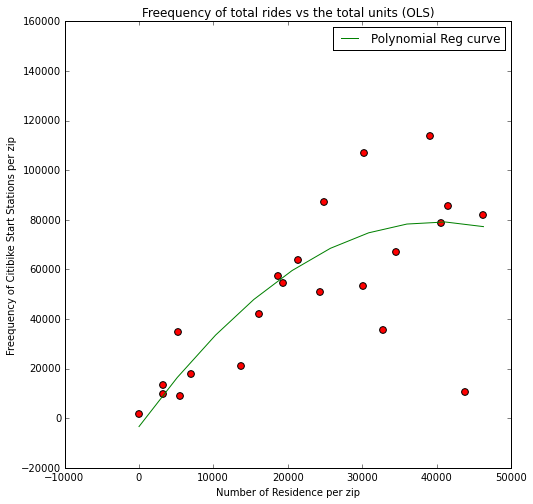

In [27]:


pl.figure(figsize=(8, 8))
pl.scatter(x, y,s=45,c='r')
x_axis = np.linspace(min(units_stations_zipData.UnitsTotal),max(units_stations_zipData.UnitsTotal),10)
#print type(x_axis)
#Convertin the numpy.ndarray to pandas data frame to handle the error :::only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

x_axis = pd.DataFrame({'UnitsTotal':np.linspace(min(units_stations_zipData.UnitsTotal),max(units_stations_zipData.UnitsTotal),10)})
print type(polModel.predict(x_axis))
pl.plot(x_axis, polModel.predict(x_axis),c='g',label='Polynomial Reg curve')
pl.title('Freequency of total rides vs the total units (OLS)')
pl.ylabel('Freequency of Citibike Start Stations per zip')
pl.xlabel('Number of Residence per zip')
pl.legend()

3) Compare you regression with a 1-degree polynomial to your regression with a 2-degree polynomial and test (with the appropriate statistical test) which is better.

##Applying Likelihood Ratio Tests
###In statistics, a likelihood ratio test is a statistical test used to compare the goodness of fit of two models, one of which (the null model) is a special case of the other (the alternative model).

######Interpretation : Source: https://en.wikipedia.org/wiki/Likelihood-ratio_test
The model with more parameters will always fit at least as well (have an equal or greater log-likelihood). Whether it fits significantly better and should thus be preferred is determined by deriving the probability or p-value of the difference D. Where the null hypothesis represents a special case of the alternative hypothesis, the probability distribution of the test statistic is approximately a chi-squared distribution with degrees of freedom equal to df2 − df1 .Symbols df1 and df2 represent the number of free parameters of models 1 and 2, the null model and the alternative model, respectively.
Please go through this wikipedia link, it has got simple explanation


log-likelihood ratio statistic = statistic compared from both the models

![alt text](https://upload.wikimedia.org/math/2/2/9/229b472081ce3580881cf29b4e376ef3.png)


In [28]:
# I am using the log-likelihood ratio statistic to figure out which fit is better , simple linear regression of the polynomial fit 
# Null hypothesis: Simple Linear fit is better
# Alternate hypothesis : Polynomial/quaderatic fit is better

#Applying the log test using 3 methods. 
    #1) using standard compare_lr_tests
    #2) doing mathematicaly 
    #3) manually putting values from the summary table
# 1 method
polModel.compare_lr_test(linModel) # p-value = 0.11476963155447581 
print 'Second number is P-Value: ',polModel.compare_lr_test(linModel)
# 2 method
print "LR : ", -2 * (linModel.llf - (polModel.llf))

# 3 method Using standard formula(mentioned above)
D = -2 * (-268.03) + 2 * (-266.78)
print 'Value of D :',D



Second number is P-Value:  (2.4872839740182826, 0.11476963155447581, 1.0)
LR :  2.48728397402
Value of D : 2.5


##Inference of the values obtained in above step.

####Null hypothesis: Simple Linear fit is better ,   Alternate hypothesis : Polynomial/quaderatic fit is better

####The value LR  needs to be compared with the critical value for chi2 with 1 degree of freedom at alpha = 0.05  and that value is 3.84

####Null hypothesis is rejected if the LR> critical value(3.84)

####In this case the LR is smaller than the critical value so we fail to reject null hypothesis.

###Hence Linear model  is better than the Polynomial model .


4) Since points at the edge of the x range have a lot of "leverage" (have a large influence on your test) if you find that there are suspicious points at the limit of the independent variable that could be outliers make cuts that remove those points and redo the fits with the 1- and 2-degree polynomial, and test which is better as you did before with a statistical test

##Without Outliers

In [29]:
# Removing the outlier by removing the data 
withoutOutlierData = units_stations_zipData[(units_stations_zipData['UnitsTotal'] > 0) 
                                            & (units_stations_zipData['UnitsTotal'] < 40000) 
                                            & (units_stations_zipData['stationCount'] < 100000)]



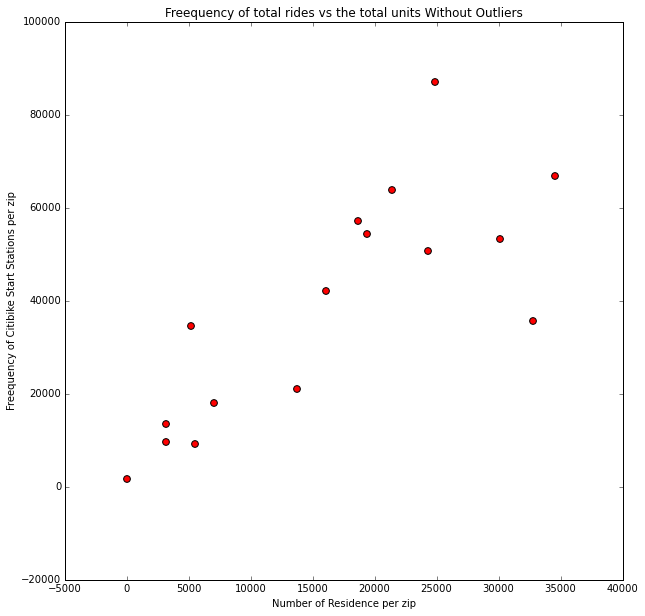

In [30]:
#Scatter plot of the data without outliers

plt.figure(figsize=(10, 10))
plt.scatter(withoutOutlierData['UnitsTotal'],withoutOutlierData['stationCount'],s=45,c='red')
plt.title('Freequency of total rides vs the total units Without Outliers')
plt.ylabel('Freequency of Citibike Start Stations per zip')
plt.xlabel('Number of Residence per zip')
#plt.bar(mynewdf['start station id'],mynewdf['UnitsRes'])


In [31]:
linModel2 = smf.ols(formula = 'stationCount ~ UnitsTotal', data = withoutOutlierData).fit()
print linModel2.summary()
x=withoutOutlierData.UnitsTotal
y=withoutOutlierData.stationCount

                            OLS Regression Results                            
Dep. Variable:           stationCount   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     23.06
Date:                Mon, 26 Oct 2015   Prob (F-statistic):           0.000281
Time:                        14:18:57   Log-Likelihood:                -176.28
No. Observations:                  16   AIC:                             356.6
Df Residuals:                      14   BIC:                             358.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.054e+04   7058.418      1.493      0.1

/Users/svarmit/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  int(n))


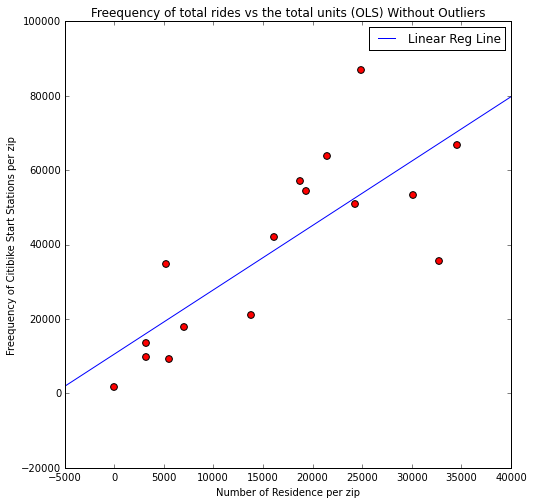

In [32]:
#Fitting the best line using abline_plot and plotting using pylab (instead of matplotlib as done above)

figure, ax = pl.subplots(figsize=(8,8))
ax.scatter(x, y,s=45, c='r')
# Plot regression line
abline_plot(model_results=linModel2, c='b', ax=ax,label='Linear Reg Line')
pl.title('Freequency of total rides vs the total units (OLS) Without Outliers')
pl.ylabel('Freequency of Citibike Start Stations per zip')
pl.xlabel('Number of Residence per zip')

plt.legend()

In [33]:
# creating the model to fit the polynomial regression
polModel2 = smf.ols(formula = 'stationCount ~ 1 + UnitsTotal + I(UnitsTotal ** 2.0)',missing='drop', data =withoutOutlierData).fit()
print polModel2.summary()

                            OLS Regression Results                            
Dep. Variable:           stationCount   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     16.96
Date:                Mon, 26 Oct 2015   Prob (F-statistic):           0.000238
Time:                        14:19:00   Log-Likelihood:                -173.80
No. Observations:                  16   AIC:                             353.6
Df Residuals:                      13   BIC:                             355.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept            -1887.8772 

<type 'numpy.ndarray'>


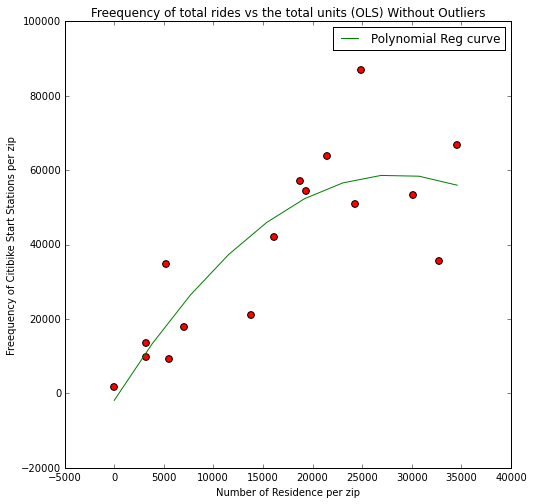

In [34]:
pl.figure(figsize=(8, 8))
pl.scatter(x, y,s=45,c='r')
x_axis = np.linspace(min(withoutOutlierData.UnitsTotal),max(withoutOutlierData.UnitsTotal),10)
#print type(x_axis)
#Convertin the numpy.ndarray to pandas data frame to handle the error :::only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
x_axis = pd.DataFrame({'UnitsTotal':np.linspace(min(withoutOutlierData.UnitsTotal),max(withoutOutlierData.UnitsTotal),10)})
print type(polModel2.predict(x_axis))
pl.plot(x_axis, polModel2.predict(x_axis),c='g',label='Polynomial Reg curve')
pl.title('Freequency of total rides vs the total units (OLS) Without Outliers')
pl.ylabel('Freequency of Citibike Start Stations per zip')
pl.xlabel('Number of Residence per zip')
pl.legend()

###Applying Log likelihood test 

In [35]:
# I am using the log-likelihood ratio statistic to figure out which fit is better , simple linear regression of the polynomial fit 
# Null hypothesis: Simple Linear fit is better
# Alternate hypothesis : Polynomial/quaderatic fit is better

#Applying the log test using 3 methods. 
    #1) using standard compare_lr_tests
    #2) doing mathematicaly 
    #3) manually putting values from the summary table
# 1 method
polModel2.compare_lr_test(linModel2) # p-value = 0.025977146651834981  
print 'Second number is P-Value: ',polModel2.compare_lr_test(linModel2)
# 2 method
print "LR : ", -2 * (linModel2.llf - (polModel2.llf))

# 3 method Using standard formula(mentioned above)
D = -2 * (-176.28) + 2 * (-173.80)
print 'Value of D :',D



Second number is P-Value:  (4.9575393559120471, 0.025977146651834981, 1.0)
LR :  4.95753935591
Value of D : 4.96


##Inference of the values obtained in above step(Without Outlier).

####Null hypothesis: Simple Linear fit is better ,   Alternate hypothesis : Polynomial/quaderatic fit is better

####The value LR  needs to be compared with the critical value for chi2 with 1 degree of freedom at alpha = 0.05  and that value is 3.84

####Null hypothesis is rejected if the LR> critical value(3.84)

####In this case the LR is greater than the critical value so we reject null hypothesis.

###Hence Linear model  is not better than the Polynomial model .


### (Restating) Polynomial/quadratic model is better than Linear model without outliers


Based on the above tests we can conclude that the number of the units per zip code is good preictor of citibike trips originating from that zip

##  Brooklyn Data

In [42]:
# Reading the Brooklyn houses data using geopandas
brooklyn_data = gp.GeoDataFrame.from_file('Brooklyn/BKMapPLUTO.shp')


In [43]:
#Reading the citibike May 2015 csv data  with geopandas
citibike_may_df = gp.GeoDataFrame.from_csv('201505-citibike-tripdata.csv')

#Reading the citibike December 2015 csv data  with geopandas
citibike_dec_df = gp.GeoDataFrame.from_csv('201412-citibike-tripdata.csv')

In [44]:
# Getting the counts and the freequeny in the variables
citibikeMayCount = citibike_may_df["start station id"].value_counts() #Returns object containing counts of unique values.
citibikeMayCount = citibikeMayCount.reset_index() # new DataFrame with labeling information in the columns under the index names, defaulting to ‘level_0’, ‘level_1’, etc
citibikeDecCount = citibike_dec_df["start station id"].value_counts() #Same as citibikeMayCount
citibikeDecCount = citibikeDecCount.reset_index() # Same as citibikeMayCount


In [45]:
#Checking the value of 5 rows for May data 
citibikeMayCount.head(n=5)

,index,0
0,521,12988
1,519,10388
2,293,10265
3,426,9588
4,497,9469


In [46]:
#Checking the value of 5 rows for december data 
citibikeDecCount.head(n=5)

,index,0
0,521,6543
1,293,4501
2,318,4467
3,435,4031
4,519,3693


In [47]:
#Renaming the index and 0 for usage latter in code.
citibikeMayCount = citibikeMayCount.rename(columns={'index':'stationId', 0:'stationCount'}) # Renaming column names
#
citibikeDecCount = citibikeDecCount.rename(columns={'index':'stationId', 0:'stationCount'}) # Renaming column names


In [48]:
#Checking the value of 2 rows for May data 
citibikeMayCount.head(n=2)

,stationId,stationCount
0,521,12988
1,519,10388


In [49]:
#Checking the value of 2 rows for December data 
citibikeDecCount.head(n=2)

,stationId,stationCount
0,521,6543
1,293,4501


In [50]:
#Concatinating both the citibike datas using Pandas standard concat function
frames = [citibikeMayCount,citibikeDecCount] #Preparing frames for concatination
citibike_data = pd.concat(frames) # Concatinating the 2 data sets
citibike_data.head(n=3)

,stationId,stationCount
0,521,12988
1,519,10388
2,293,10265


In [51]:
#Sum up the common station id's if any
uniq_citibike_data = citibike_data['stationCount'].groupby(citibike_data['stationId']).agg(np.sum) # Using groupby function of pandas
uniq_citibike_data = uniq_citibike_data.reset_index() 
uniq_citibike_data = uniq_citibike_data.rename(columns={'index':'stationId', 0:'stationCount'}) 
print (uniq_citibike_data.head(n=5))
print len(uniq_citibike_data)

   stationId  stationCount
0         72          3793
1         79          3353
2         82          1538
3         83          1458
4        116          4396
332


In [52]:
#Reading the Json data from the given url and putting in the dictionary type variable
json_data = []
url = 'http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/stationzips.json'
request = urllib2.urlopen(url)
json_data = json.loads(request.read())
#json_data

In [53]:
#Converting Json data to Pandas Data Frame
stat_zip_data = pd.DataFrame(json_data.items(),columns=['stationId','zip'])
print 'before convert-->',(stat_zip_data['stationId'].dtype)
stat_zip_data['stationId'] = (stat_zip_data['stationId']).astype(float)
print 'after convert -->',(stat_zip_data['stationId'].dtype)


before convert--> object
after convert --> float64


In [54]:
#Merging the JSON data and the manipulated Citibike data of May and december
uniq_citibike_data['stationId'] = (uniq_citibike_data['stationId']).astype(float) # Converting the data to float to merge with float json data
citibike_zip_data = pd.merge(uniq_citibike_data,stat_zip_data,how='inner',on='stationId') #Merging the data with inner join on stationID
print citibike_zip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 331
Data columns (total 3 columns):
stationId       332 non-null float64
stationCount    332 non-null int64
zip             331 non-null float64
dtypes: float64(2), int64(1)
memory usage: 10.4 KB
None


In [55]:
#Just to see the data 
citibike_zip_data.head(n=5)

,stationId,stationCount,zip
0,72,3793,10019
1,79,3353,10013
2,82,1538,10038
3,83,1458,11217
4,116,4396,10011


In [56]:
# Adding the station counts for each zip
# 
group_citibike_zip = citibike_zip_data['stationCount'].groupby(citibike_zip_data['zip']).agg(np.sum)
group_citibike_zip = group_citibike_zip.reset_index()
print group_citibike_zip
#group_citibike_zip

      zip  stationCount
0      83          8445
1   10001        107096
2   10002         78867
3   10003        150693
4   10004         13493
5   10005         17921
6   10007         34654
7   10009         66838
8   10010         50815
9   10011        113756
10  10012         57230
11  10013         63772
12  10014         87009
13  10016         81935
14  10017         54317
15  10018         42032
16  10019         85573
17  10022         35663
18  10023         10371
19  10036         53348
20  10038         21030
21  10280          9119
22  10281          1651
23  10282          9730
24  11201         48851
25  11205         15777
26  11211         17314
27  11216          2057
28  11217         11090
29  11220             6
30  11238          6071
31  11251          1038


In [57]:
# To see all the columns of the brooklyndata
brooklyn_data.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [58]:
#Simmilarly grouping the sum of the Brooklyn units in the zip code
brooklyn_data_zip = brooklyn_data['UnitsTotal'].groupby(brooklyn_data['ZipCode']).agg(np.sum)
brooklyn_data_zip = brooklyn_data_zip.reset_index()
brooklyn_data_zip = brooklyn_data_zip.rename(columns={'ZipCode':'zip', 0:'stationCount'})
brooklyn_data_zip['zip'] = (brooklyn_data_zip['zip']).astype(float) #Converting to float as zip in citibike is float
print brooklyn_data_zip['zip'].dtype
brooklyn_data_zip.head(n=3)

float64


,zip,UnitsTotal
0,0,10
1,11201,37927
2,11203,28527


In [59]:
# Merging the station rides of citibike and the Total units of the brooklyn in single data frame using inner join on the column zip.
units_stations_zipData = pd.merge(brooklyn_data_zip, group_citibike_zip, how ='inner',on='zip')
units_stations_zipData.head(n=5)

,zip,UnitsTotal,stationCount
0,11201,37927,48851
1,11205,19947,15777
2,11211,31277,17314
3,11216,26530,2057
4,11217,22091,11090


In [60]:
# Till now I have a data sets(dataframe) with the total units per zip code and total station count per zip code
#StationCpunt reffers to the total number of rides originating from the zip code
#UnitsTotal reffers to total number of units (units in each building if a building has more than 1 unit)

#####1) Fit BOTH a first and second degree linear model (a line and a parabola) to the number of rides per zip code (this is your dependent variable) as a function of number of Residential Units in that zip code (this is your independent variable).

###Starting the statestical analysis 


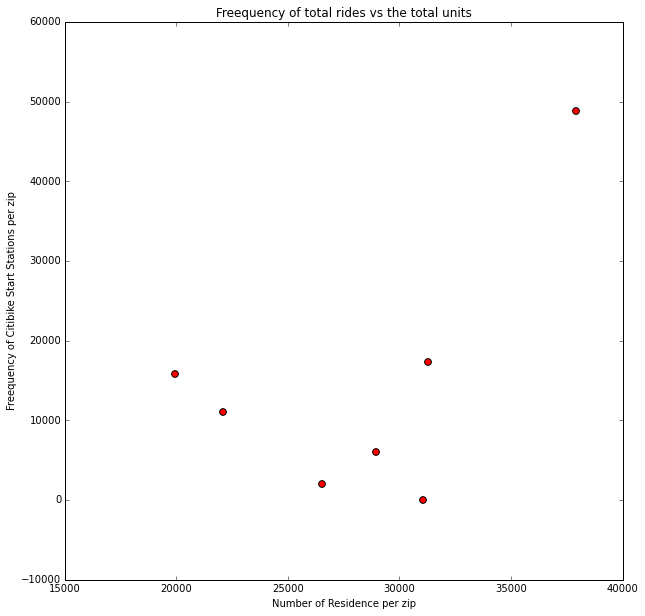

In [61]:
#Plotting the data with the outliers and zip code =0
plt.figure(figsize=(10, 10))
plt.scatter(units_stations_zipData['UnitsTotal'],units_stations_zipData['stationCount'],s=45,c='red')
plt.title('Freequency of total rides vs the total units')
plt.ylabel('Freequency of Citibike Start Stations per zip')
plt.xlabel('Number of Residence per zip')
#plt.bar(mynewdf['start station id'],mynewdf['UnitsRes'])


In [62]:
linModel = smf.ols(formula = 'stationCount ~ UnitsTotal', data = units_stations_zipData).fit()
print linModel.summary()
x=units_stations_zipData.UnitsTotal
y=units_stations_zipData.stationCount

                            OLS Regression Results                            
Dep. Variable:           stationCount   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     2.074
Date:                Mon, 26 Oct 2015   Prob (F-statistic):              0.209
Time:                        15:11:19   Log-Likelihood:                -76.164
No. Observations:                   7   AIC:                             156.3
Df Residuals:                       5   BIC:                             156.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2.719e+04   2.95e+04     -0.922      0.3

/Users/svarmit/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n))


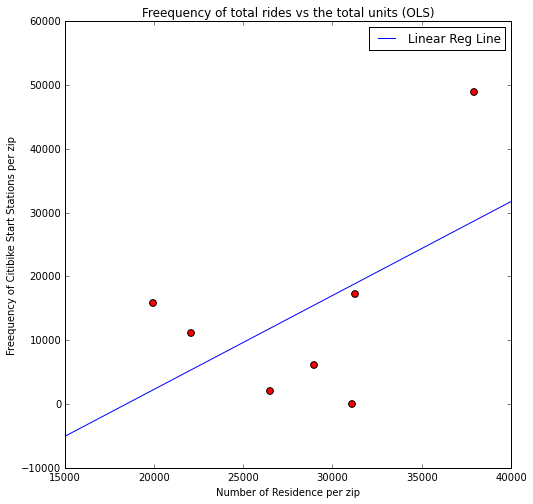

In [63]:
#Fitting the best line using abline_plot and plotting using pylab (instead of matplotlib as done above)

figure, ax = pl.subplots(figsize=(8,8))
ax.scatter(x, y,s=45, c='r')
# Plot regression line
abline_plot(model_results=linModel, c='b', ax=ax,label='Linear Reg Line')
pl.title('Freequency of total rides vs the total units (OLS)')
pl.ylabel('Freequency of Citibike Start Stations per zip')
pl.xlabel('Number of Residence per zip')

plt.legend()

In [64]:
# creating the model to fit the polynomial regression
polModel = smf.ols(formula = 'stationCount ~ 1 + UnitsTotal + I(UnitsTotal ** 2.0)',missing='drop', data =units_stations_zipData).fit()
print polModel.summary()

                            OLS Regression Results                            
Dep. Variable:           stationCount   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     19.65
Date:                Mon, 26 Oct 2015   Prob (F-statistic):            0.00853
Time:                        15:11:19   Log-Likelihood:                -69.042
No. Observations:                   7   AIC:                             144.1
Df Residuals:                       4   BIC:                             143.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept             2.504e+05 

<type 'numpy.ndarray'>


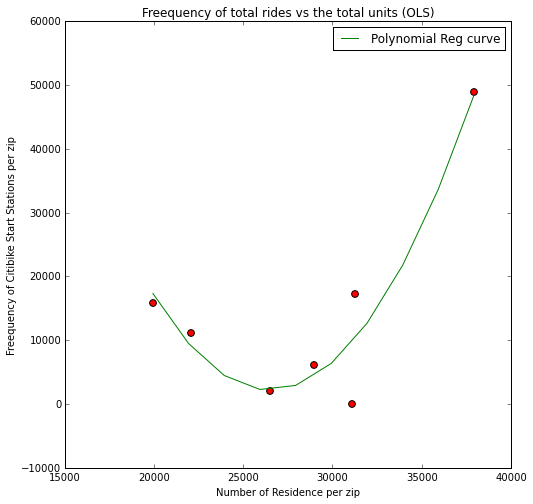

In [65]:


pl.figure(figsize=(8, 8))
pl.scatter(x, y,s=45,c='r')
x_axis = np.linspace(min(units_stations_zipData.UnitsTotal),max(units_stations_zipData.UnitsTotal),10)
#print type(x_axis)
#Convertin the numpy.ndarray to pandas data frame to handle the error :::only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

x_axis = pd.DataFrame({'UnitsTotal':np.linspace(min(units_stations_zipData.UnitsTotal),max(units_stations_zipData.UnitsTotal),10)})
print type(polModel.predict(x_axis))
pl.plot(x_axis, polModel.predict(x_axis),c='g',label='Polynomial Reg curve')
pl.title('Freequency of total rides vs the total units (OLS)')
pl.ylabel('Freequency of Citibike Start Stations per zip')
pl.xlabel('Number of Residence per zip')
pl.legend()

##Applying Likelihood Ratio Tests
###In statistics, a likelihood ratio test is a statistical test used to compare the goodness of fit of two models, one of which (the null model) is a special case of the other (the alternative model).

In [66]:
# I am using the log-likelihood ratio statistic to figure out which fit is better , simple linear regression of the polynomial fit 
# Null hypothesis: Simple Linear fit is better
# Alternate hypothesis : Polynomial/quaderatic fit is better

#Applying the log test using 3 methods. 
    #1) using standard compare_lr_tests
    #2) doing mathematicaly 
# 1 method
polModel.compare_lr_test(linModel) # p-value = 0.00016051724289017601  very small!!! 
print 'Second number is P-Value: ',polModel.compare_lr_test(linModel)
# 2 method
print "LR : ", -2 * (linModel.llf - (polModel.llf))



Second number is P-Value:  (14.244640785792427, 0.00016051724289017601, 1.0)
LR :  14.2446407858


In [67]:
##Inference of the values obtained in above step.

####Null hypothesis: Simple Linear fit is better ,   Alternate hypothesis : Polynomial/quaderatic fit is better

####The value LR  needs to be compared with the critical value for chi2 with 1 degree of freedom at alpha = 0.05  and that value is 3.84

####Null hypothesis is rejected if the LR> critical value(3.84)

####In this case the LR is greater than the critical value so we reject the null hypothesis.

###Hence Linear model  is not better than the Polynomial model for brooklyn data.


##Without Outliers

                            OLS Regression Results                            
Dep. Variable:           stationCount   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                 -0.082
Method:                 Least Squares   F-statistic:                    0.6219
Date:                Mon, 26 Oct 2015   Prob (F-statistic):              0.474
Time:                        15:11:36   Log-Likelihood:                -60.794
No. Observations:                   6   AIC:                             125.6
Df Residuals:                       4   BIC:                             125.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2.351e+04    1.9e+04      1.237      0.2

/Users/svarmit/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n))


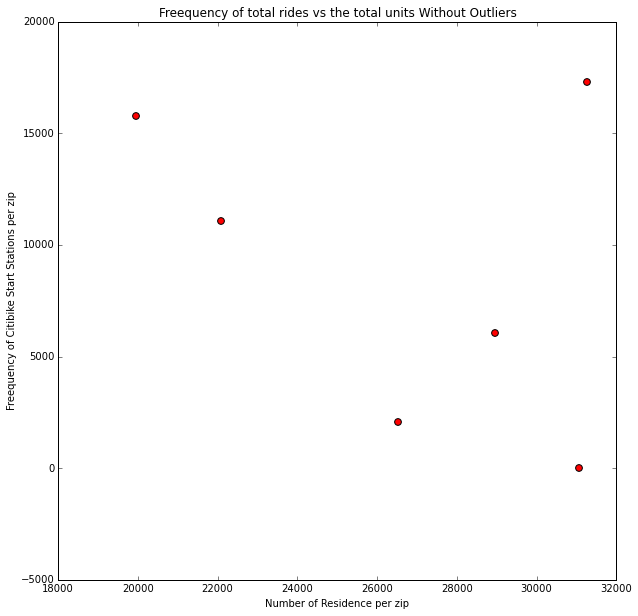

In [68]:
# Removing the outlier by removing the data 
withoutOutlierData = units_stations_zipData[(units_stations_zipData['UnitsTotal'] > 0) 
                                            & (units_stations_zipData['UnitsTotal'] < 35000) 
                                            & (units_stations_zipData['stationCount'] < 35000)]


#Scatter plot of the data without outliers

plt.figure(figsize=(10, 10))
plt.scatter(withoutOutlierData['UnitsTotal'],withoutOutlierData['stationCount'],s=45,c='red')
plt.title('Freequency of total rides vs the total units Without Outliers')
plt.ylabel('Freequency of Citibike Start Stations per zip')
plt.xlabel('Number of Residence per zip')
#plt.bar(mynewdf['start station id'],mynewdf['UnitsRes'])

linModel2 = smf.ols(formula = 'stationCount ~ UnitsTotal', data = withoutOutlierData).fit()
print linModel2.summary()
x=withoutOutlierData.UnitsTotal
y=withoutOutlierData.stationCount
#Fitting the best line using abline_plot and plotting using pylab (instead of matplotlib as done above)

                            OLS Regression Results                            
Dep. Variable:           stationCount   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     1.111
Date:                Mon, 26 Oct 2015   Prob (F-statistic):              0.435
Time:                        15:11:46   Log-Likelihood:                -59.565
No. Observations:                   6   AIC:                             125.1
Df Residuals:                       3   BIC:                             124.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept             2.115e+05 

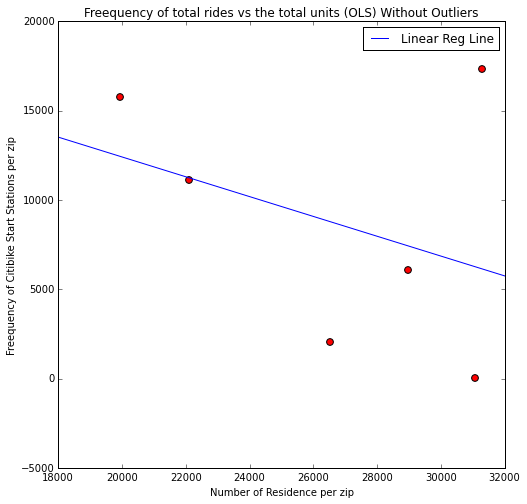

In [69]:
figure, ax = pl.subplots(figsize=(8,8))
ax.scatter(x, y,s=45, c='r')
# Plot regression line
abline_plot(model_results=linModel2, c='b', ax=ax,label='Linear Reg Line')
pl.title('Freequency of total rides vs the total units (OLS) Without Outliers')
pl.ylabel('Freequency of Citibike Start Stations per zip')
pl.xlabel('Number of Residence per zip')
plt.legend()
# creating the model to fit the polynomial regression
polModel2 = smf.ols(formula = 'stationCount ~ 1 + UnitsTotal + I(UnitsTotal ** 2.0)',missing='drop', data =withoutOutlierData).fit()
print polModel2.summary()


<type 'numpy.ndarray'>


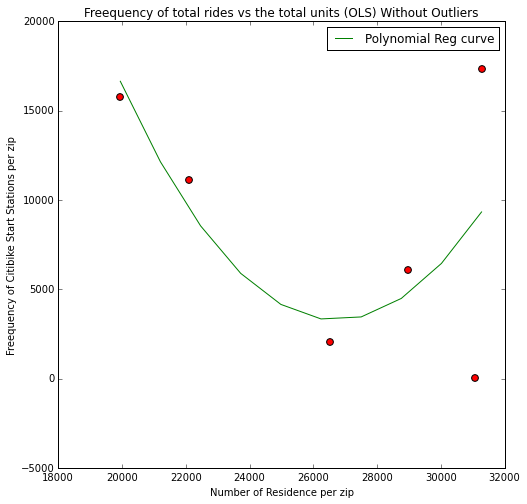

In [70]:
pl.figure(figsize=(8, 8))
pl.scatter(x, y,s=45,c='r')
x_axis = np.linspace(min(withoutOutlierData.UnitsTotal),max(withoutOutlierData.UnitsTotal),10)
#print type(x_axis)
#Convertin the numpy.ndarray to pandas data frame to handle the error :::only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
x_axis = pd.DataFrame({'UnitsTotal':np.linspace(min(withoutOutlierData.UnitsTotal),max(withoutOutlierData.UnitsTotal),10)})
print type(polModel2.predict(x_axis))
pl.plot(x_axis, polModel2.predict(x_axis),c='g',label='Polynomial Reg curve')
pl.title('Freequency of total rides vs the total units (OLS) Without Outliers')
pl.ylabel('Freequency of Citibike Start Stations per zip')
pl.xlabel('Number of Residence per zip')
pl.legend()

In [71]:
###Applying Log likelihood test 
# I am using the log-likelihood ratio statistic to figure out which fit is better , simple linear regression of the polynomial fit 
# Null hypothesis: Simple Linear fit is better
# Alternate hypothesis : Polynomial/quaderatic fit is better

#Applying the log test using 3 methods. 
    #1) using standard compare_lr_tests
    #2) doing mathematicaly 
    #3) manually putting values from the summary table
# 1 method
polModel2.compare_lr_test(linModel2) # p-value = 0.025977146651834981  
print 'Second number is P-Value: ',polModel2.compare_lr_test(linModel2)
# 2 method
print "LR : ", -2 * (linModel2.llf - (polModel2.llf))

# 3 method Using standard formula(mentioned above)
D = -2 * (-176.28) + 2 * (-173.80)
print 'Value of D :',D

Second number is P-Value:  (2.4589474277070167, 0.11685706609895422, 1.0)
LR :  2.45894742771
Value of D : 4.96


##Inference of the values obtained in above step(Without Outlier).

####Null hypothesis: Simple Linear fit is better ,   Alternate hypothesis : Polynomial/quaderatic fit is better

####The value LR  needs to be compared with the critical value for chi2 with 1 degree of freedom at alpha = 0.05  and that value is 3.84

####Null hypothesis is rejected if the LR> critical value(3.84)

####In this case also the LR is greater than the critical value so we reject null hypothesis.

###Hence Linear model  is not better than the Polynomial model .


### Again Polynomial/quadratic model is better than Linear model without outliers


****
6) Discuss if the test could be improved: the number of residential units may be a good predictor under specific circumstances (restricting your dataset by any variable, eg only certain times, days, areas, what do you think?), and if you have time test these other hypothesis (for extra credit). Try and imagine what variable could be a better predictor (and if you have time test other vatiables also for extra credit).
*****

###Trying to improve test with changing the hypothesis.

Assumption: 9 am to 6pm are office hours. 
So the better indicator for residential units will be if evaluated with the consideration of office hours(as no one will come back to residence for just using citibike(assumption!!)).
Creating new data by removing the station id's when the start time lies in the office hour

In [ ]:
#Reading the citibike May 2015 csv data  with geopandas
df1 = gp.GeoDataFrame.from_csv('201505-citibike-tripdata.csv',parse_dates=['starttime'])

#Reading the citibike December 2015 csv data  with geopandas
df2 = gp.GeoDataFrame.from_csv('201412-citibike-tripdata.csv',parse_dates=['starttime'])

# Getting the counts and the freequeny in the variables
citibikeMayCount = citibike_may_df["start station id"].value_counts() #Returns object containing counts of unique values.
citibikeMayCount = citibikeMayCount.reset_index() # new DataFrame with labeling information in the columns under the index names, defaulting to ‘level_0’, ‘level_1’, etc
citibikeDecCount = citibike_dec_df["start station id"].value_counts() #Same as citibikeMayCount
citibikeDecCount = citibikeDecCount.reset_index() # Same as citibikeMayCount


df1['stationD'] = df1['start station id'][(df1['usertype'] == 'Subscriber') & (df1['starttime'].dt.hour <18) & (df1['starttime'].dt.hour >9)]
df2['stationN'] = df2['start station id'][(df2['usertype'] == 'Subscriber') & (df2['starttime'].dt.hour >=18) &(df2['starttime'].dt.hour >9)]
df.ageN.describe()
df.ageD.describe()

In [ ]:
# Getting the counts and the freequeny in the variables
citibikeMayCount = df1["start station id"].value_counts() #Returns object containing counts of unique values.
citibikeMayCount = citibikeMayCount.reset_index() # new DataFrame with labeling information in the columns under the index names, defaulting to ‘level_0’, ‘level_1’, etc
citibikeDecCount = df2["start station id"].value_counts() #Same as citibikeMayCount
citibikeDecCount = citibikeDecCount.reset_index() # Same as citibikeMayCount